In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image Segmentation
Process of segmenting the image into clusters based on image intensity and other features.
### 1. Region Growing
Starts from a single pixel then grows by checking the neighbors.\
#### Process
1. Select a Seed Pixel
2. Check 4 or 8 neighbors
3. Add the neighbor to the cluster if I(neighbor) - I(seed) < Threshold
4. Repeat for all pixels until no new pixels can be added.

**Cons -**\
- Sensitive to selection of Seed and Noise.
- Not suitable for large images as it will take a lot of computational power.
- Need to have a good threshold to avoid noise.

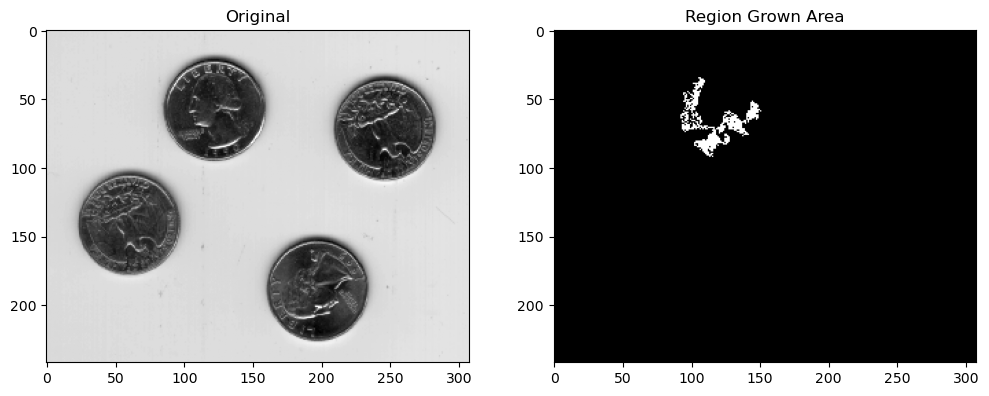

In [19]:
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def region_growing(img, seed, threshold=100, connectivity=8):
    h, w = img.shape
    mask = np.zeros((h, w), np.uint8)   # MAsk to denote segmentation
    visited = np.zeros((h, w), np.bool_) # Map to denote whether the pixels are visited or not

    seed_value = int(img[seed[1], seed[0]]) #
    q = deque([seed])
    mask[seed[1], seed[0]] = 255
    visited[seed[1], seed[0]] = True

    # Neighbor directions
    if connectivity == 4:
        neighbors = [(-1,0),(1,0),(0,-1),(0,1)]
    else:
        neighbors = [(-1,0),(1,0),(0,-1),(0,1),(-1,-1),(-1,1),(1,-1),(1,1)]

    while q:
        x, y = q.popleft()
        for dx, dy in neighbors:
            nx, ny = x+dx, y+dy
            if 0 <= nx < w and 0 <= ny < h and not visited[ny, nx]:
                if abs(int(img[ny, nx]) - seed_value) < threshold:  # Compares the neighbours with the threshold
                    mask[ny, nx] = 255
                    q.append((nx, ny))
                visited[ny, nx] = True
    return mask

img = cv2.imread('images/eight.tif', 0)
seed = (100, 50)   # Starting point
mask = region_growing(img, seed, threshold=8, connectivity=8)

# Show results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Region Grown Area")
plt.imshow(mask, cmap='gray')
plt.show()



### 2. WaterShed Segmentation

### 3. Graph-based Segmentation (GrabCut)

### 4. Contour Detection